In [1]:
import pandas as pd

In [37]:
heart_disease = pd.read_csv(r'C:\Users\hyper\Downloads\heart.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Cleaning

In [4]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart_disease = heart_disease.fillna(heart_disease.mean())

In [6]:
heart_disease = heart_disease.drop_duplicates()

### Data integration

In [8]:
subSet1 = heart_disease[['age','cp','chol','thalachh']]

In [9]:
subSet2 = heart_disease[['exng','slp','output']]

In [10]:
concat = pd.concat([subSet1, subSet2], axis=1)

In [11]:
concat.head()

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,37,2,250,187,0,0,1
2,41,1,204,172,0,2,1
3,56,1,236,178,0,2,1
4,57,0,354,163,1,2,1


### Error Handling

In [13]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [14]:
# Remove outliers for each column using a loop
col_name = ['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    heart_disease[col] = remove_outliers(heart_disease[col])

In [16]:
heart_disease = heart_disease.dropna()

In [18]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [20]:
heart_disease = heart_disease.drop('fbs',axis=1)

In [26]:
import matplotlib.pyplot as plt

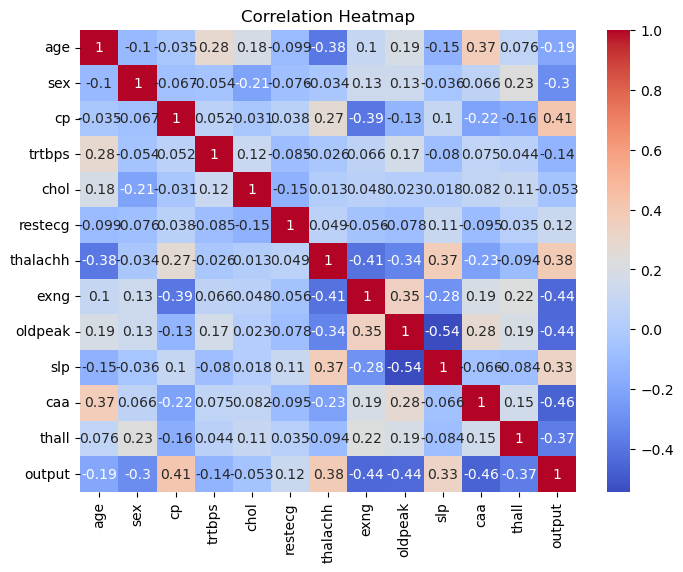

In [27]:
# Compute correlations between features and target
correlations = heart_disease.corr()['output'].drop('output')

# Print correlations
correlations

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heart_disease.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### data integration

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# splitting data using train test split
x = heart_disease[['cp','thalachh','exng','oldpeak','slp','caa']]
y = heart_disease.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### data transformation

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### Model Bulding

In [33]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8363636363636363


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

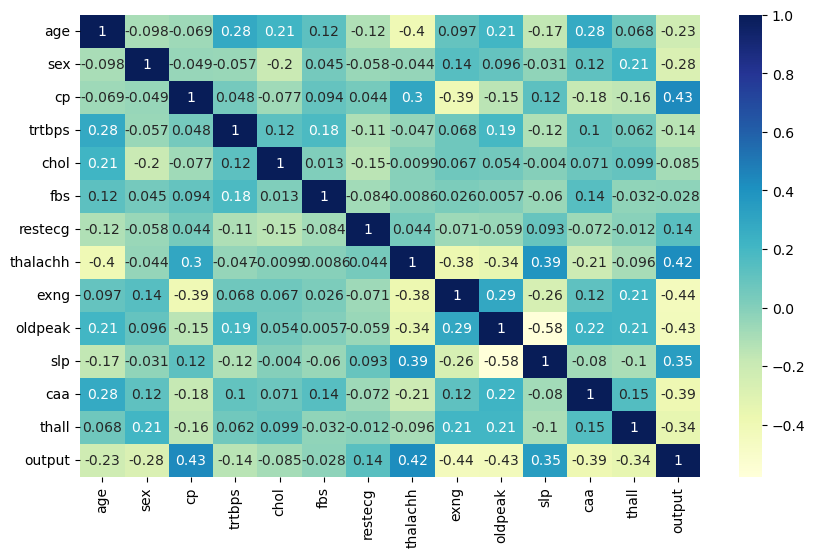

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_disease.corr(),cmap = 'YlGnBu', annot = True)

<Axes: xlabel='age', ylabel='cp'>

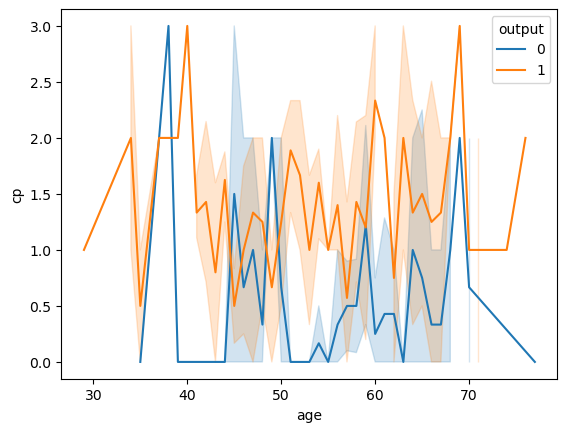

In [45]:
sns.lineplot(data=heart_disease,x=heart_disease.age,y=heart_disease.cp,hue='output')

<Axes: xlabel='age', ylabel='trtbps'>

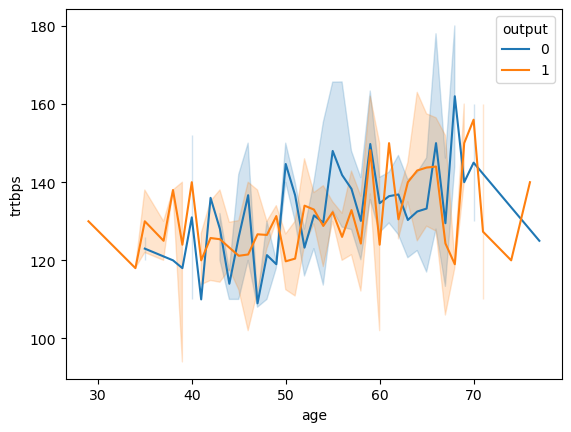

In [46]:
sns.lineplot(data=heart_disease,x=heart_disease.age,y=heart_disease.trtbps,hue='output')

<Axes: xlabel='output', ylabel='Count'>

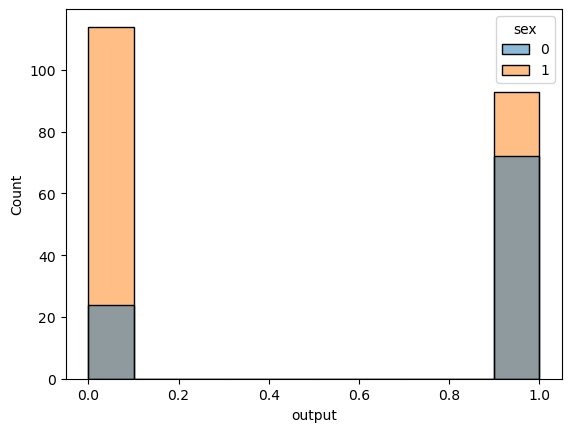

In [49]:
# Shows the Distribution of Heat Diseases with respect to male and female
sns.histplot(data=heart_disease,
x=heart_disease.output,
hue=heart_disease.sex)

[]

<Figure size 1500x1000 with 0 Axes>

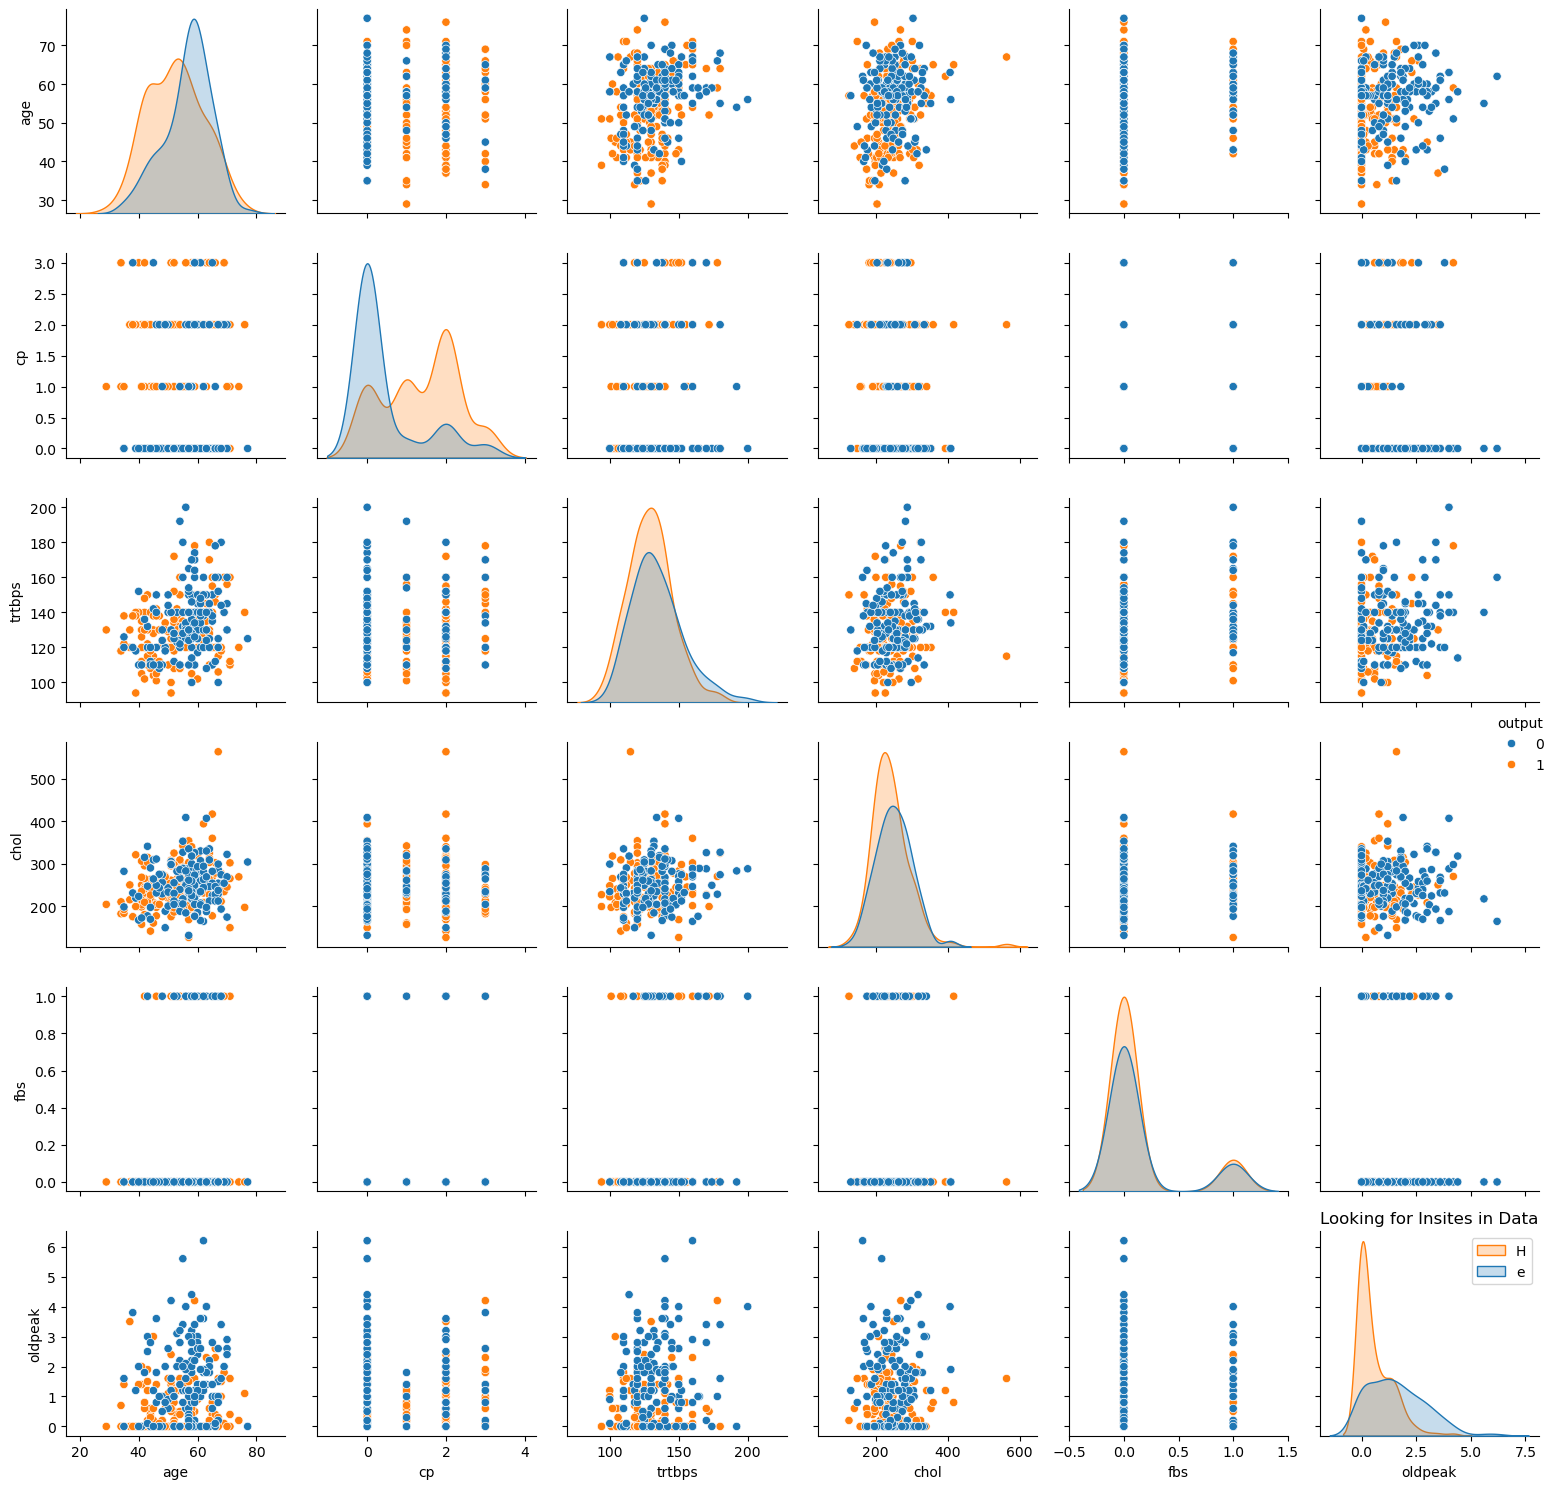

In [51]:
temp_df = heart_disease[['age','cp', 'trtbps','chol','fbs','oldpeak','output']]
plt.figure(figsize=(15,10))
sns.pairplot(temp_df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

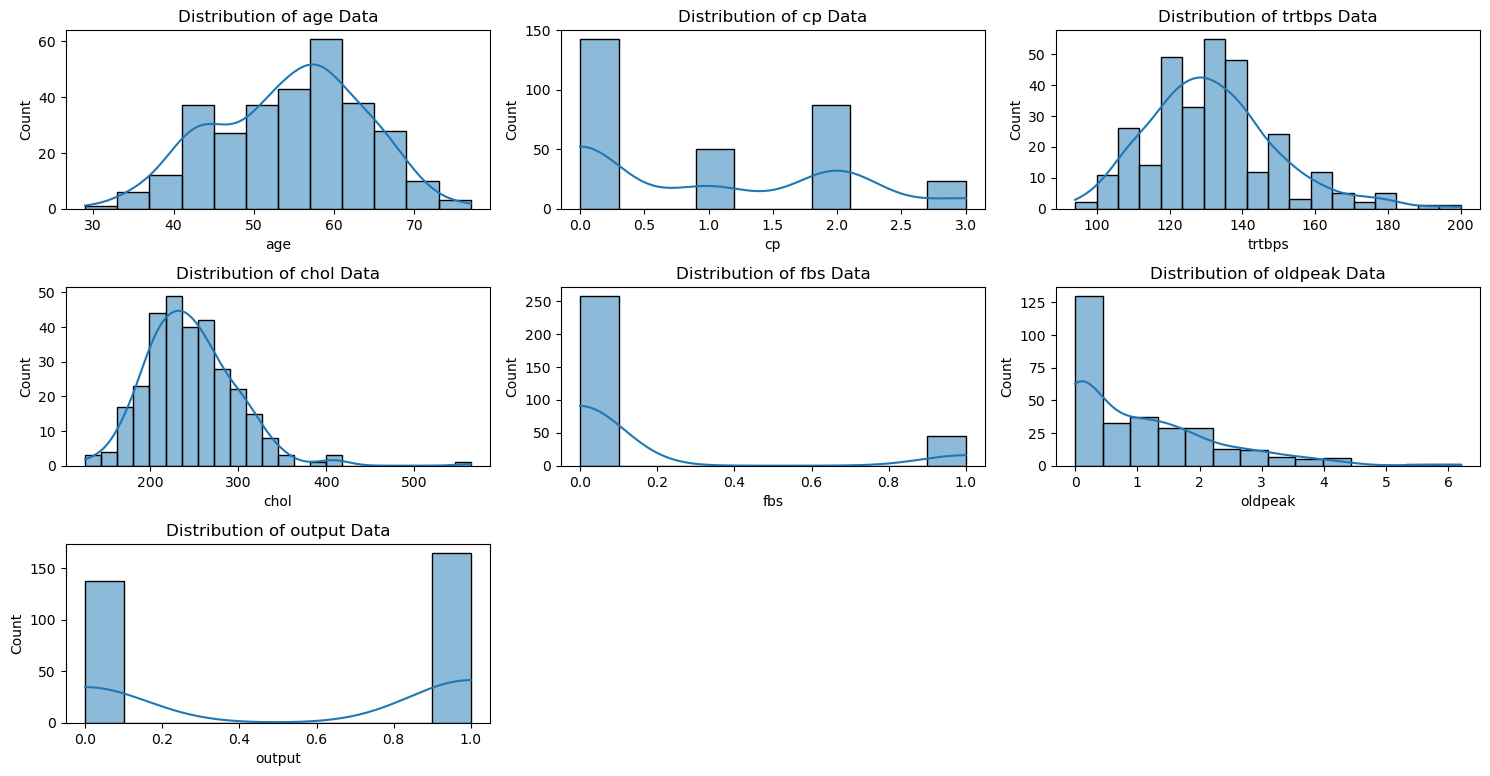

In [53]:
plt.figure(figsize=(15,10))
for i,col in enumerate(temp_df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_disease[col],kde=True)
    plt.tight_layout()
    plt.plot()